In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import wave
import tensorflow as tf
import IPython
import zipfile

import IPython.display as ipd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import wave
import scipy
from collections import Counter

# EDA on Curated data

In [5]:

with zipfile.ZipFile('/content/train_curated.zip', 'r') as zip_ref:
    zip_ref.extractall('train_curated')

In [6]:
# loading train_curated.csv into pandas dataframe
train_curated=pd.read_csv('/content/train_curated.csv')
train_curated

fname           labels
0     0006ae4e.wav             Bark
1     0019ef41.wav         Raindrop
2     001ec0ad.wav  Finger_snapping
3     0026c7cb.wav              Run
4     0026f116.wav  Finger_snapping
...            ...              ...
4965  ffd4ed26.wav        Tick-tock
4966  ffdc411e.wav             Slam
4967  ffe2178b.wav              Bus
4968  fffa69b7.wav  Electric_guitar
4969  ffff4631.wav             Meow

[4970 rows x 2 columns]

We can see that curated data contains 4970 audio files

In [7]:
# Checking number of different classes
labels_list=set()
for ele in train_curated['labels']:
    ele=ele.split(',')
    for label in ele:
        labels_list.add(label)
print("number of unique classes in curated data is",len(labels_list))

number of unique classes in curated data is 80


In [ ]:
# Calculating number of audio files for each label in curated data.
count_list=[] 

for label in labels_list:
    count=0
    for ele in train_curated['labels']:
        for lbl in ele.split(','):
            if label==lbl:
                count+=1
    count_list.append(count)

In [ ]:
count_df=pd.DataFrame({'labels':list(labels_list),'count':count_list})
count_df=count_df.sort_values('count')

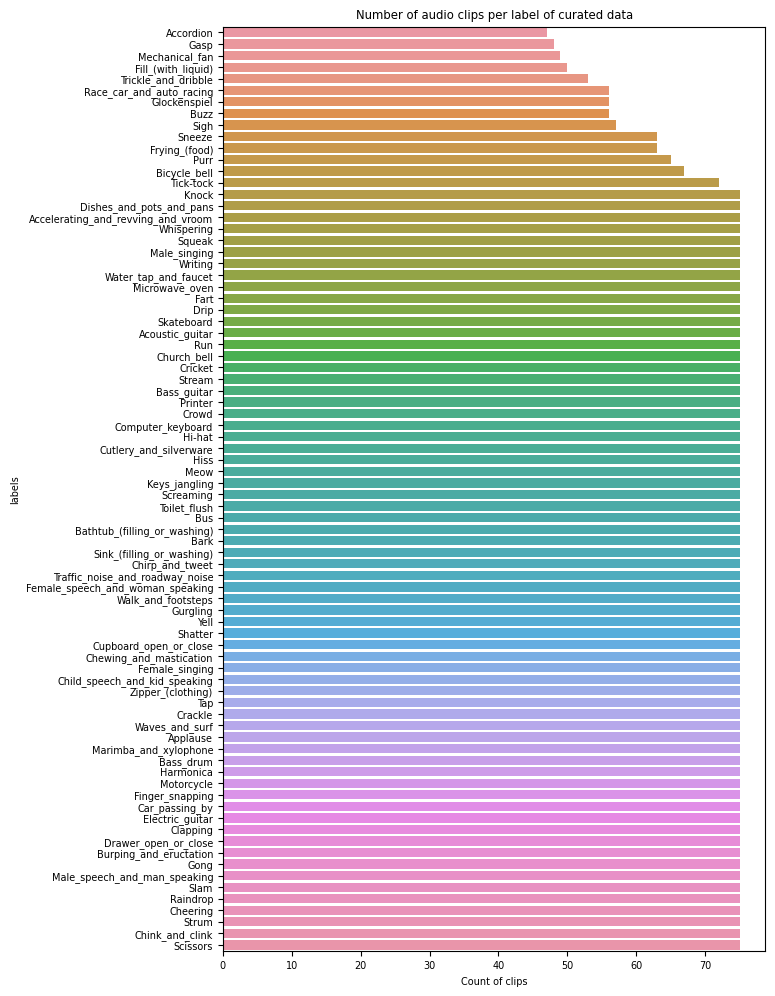

In [ ]:
#Barplot for audio clips per label
plt.figure(figsize =(7, 12))
plt.rcParams.update({'font.size': 7})
sns.barplot(data=count_df,x='count',y='labels')
plt.title('Number of audio clips per label of curated data')
plt.xlabel('Count of clips')
plt.show()

Observation: Most of the labels have equal data points i.e 75. Some labels are less than 75 and accordion is having least number of audio clips in curated data

In [8]:
#getting length of audio files in curated data
length_list=[]
for ele in train_curated['fname']:
  with wave.open("/content/train_noisy/"+ele) as mywav:
    duration_seconds = mywav.getnframes() / mywav.getframerate()
    length_list.append(duration_seconds)


In [13]:
print('median of duartion of audio files for curated data is',np.median(length_list))

median of duartion of audio files for curated data is 4.675918367346939


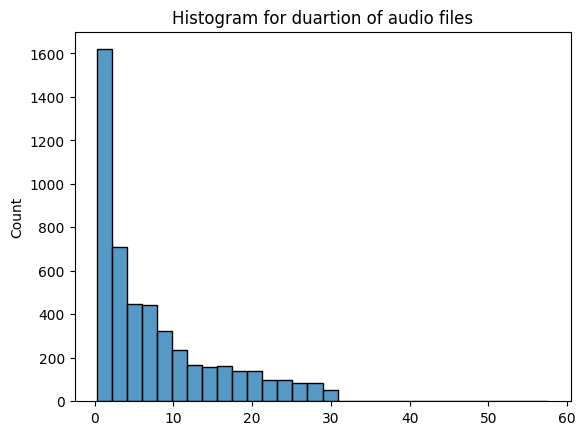

In [85]:
sns.histplot(length_list,bins=30)
plt.title('Histogram for duartion of audio files')
plt.show()

Observation: Most of the files have duration between 0-3 sec in curated data

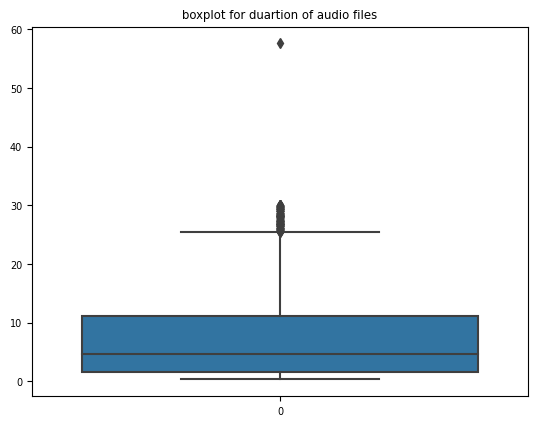

In [ ]:
sns.boxplot(length_list)
plt.title('boxplot for duartion of audio files')
plt.show()

Observations: From above plots we can see that more than 75% of the audio clips have duration less than 12 sec. 50% files have less than 3 sec duration. Also there is an outlier with duration greater than 50sec

In [ ]:
for i,ele in enumerate(length_list):
    if ele>50:
        print(train_curated.iloc[[i]])

             fname  labels
2316  77b925c2.wav  Stream


77b925c2.wav file is an outlier

In [14]:
import IPython.display as ipd
ipd.Audio('/content/train_curated/77b925c2.wav')

In [ ]:
# Number of labels per clip
 
from collections import Counter
labels_per_clip=[]
for ele in train_curated['labels']:
    length=len(ele.split(','))
    labels_per_clip.append(length)

occurence=Counter(labels_per_clip)
count_of_lbls=[]
num_of_clips=[]
for key,value in occurence.items():
    count_of_lbls.append(key)
    num_of_clips.append(value)
labels_per_clip_df=pd.DataFrame({'count_labels':count_of_lbls,'num_of_clips':num_of_clips,'percent':list(np.round(np.array(num_of_clips)/4907*100,4))})
labels_per_clip_df

count_labels  num_of_clips  percent
0             1          4269  86.9982
1             2           627  12.7777
2             3            69   1.4062
3             4             4   0.0815
4             6             1   0.0204

Observation: 87 % audio files have only one label. Only 1 file in curated data has 6 labels

In [16]:
#adding duration column 
train_curated['duration']=length_list

In [71]:
# Choosing five random labels
five_random_labels = np.random.choice(list(labels_list), size=10, replace=False)
five_random_labels

array(['Waves_and_surf', 'Male_speech_and_man_speaking', 'Car_passing_by',
       'Computer_keyboard', 'Bathtub_(filling_or_washing)', 'Purr',
       'Microwave_oven', 'Drawer_open_or_close', 'Printer', 'Gurgling'],
      dtype='<U34')

In [72]:
df= pd.DataFrame()
for idx, row in train_curated.iterrows():
    for lbl in list(five_random_labels):
      if lbl in row['labels'].split(','):
        row['labels']=lbl
        df=df.append(row,ignore_index=True)

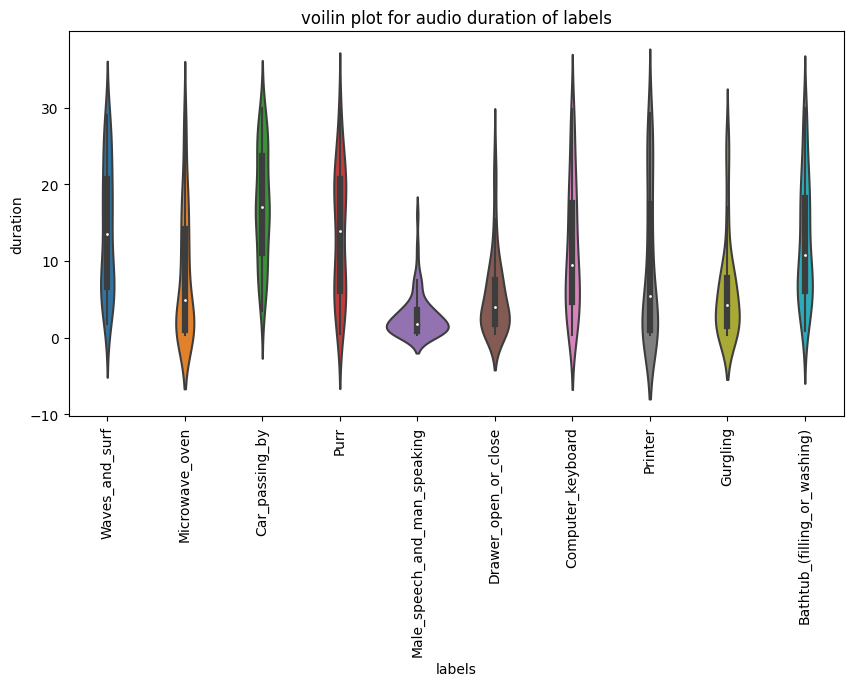

In [74]:

plt.figure(figsize =(10, 5))
sns.violinplot(x='labels', y='duration', data=df)
plt.title('voilin plot for audio duration of labels')
plt.xticks(rotation=90)
plt.show()

Observation: Variances of duration of audio files for labels in curated data are very different from each other. 

In [76]:
#getting peak amplitude and avg amplitude (curated data)
peak_amp_lst=[]
avg_amp_lst=[]
for ele in train_curated['fname']:
  samplerate, data = scipy.io.wavfile.read("/content/train_curated/"+ele)
  abs_data = np.abs(data)
  peak_amp_lst.append(np.max(abs_data))
  avg_amp_lst.append(np.mean(abs_data))


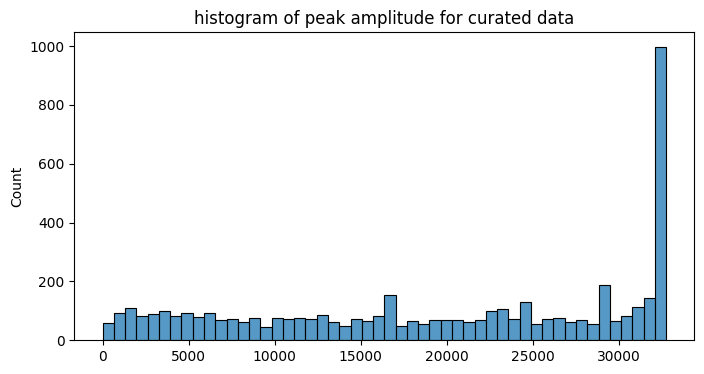

In [81]:
plt.figure(figsize =(8, 4))
sns.histplot(peak_amp_lst,bins=50)
plt.title('histogram of peak amplitude for curated data')
plt.show()

Observation: Most of the audio files have peak amplitude greater than 30k

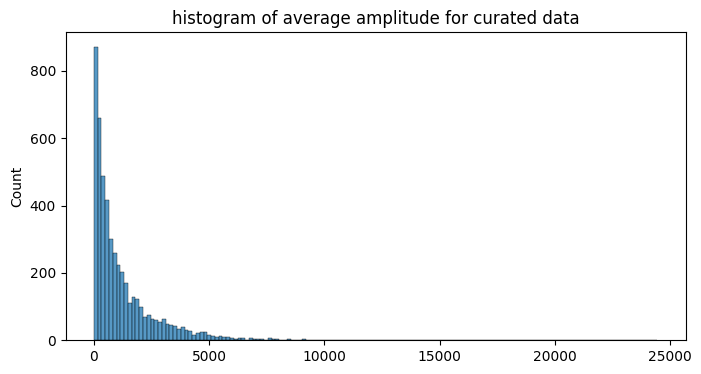

In [84]:
plt.figure(figsize =(8, 4))
sns.histplot(avg_amp_lst)
plt.title('histogram of average amplitude for curated data')
plt.show()

Observation: most of the values have average amplitude near zero value. As the average amplitude is increasing we can see that the count of audio files is decreasing very fast. Very few values have avg amplitude greater than 20k.

# EDA on noisy data

In [4]:
with zipfile.ZipFile('/content/train_noisy.zip', 'r') as zip_ref:
    zip_ref.extractall('noisy_data')

In [5]:
train_noisy=pd.read_csv('/content/train_noisy.csv')
train_noisy

fname                                          labels
0      00097e21.wav                    Bathtub_(filling_or_washing)
1      000b6cfb.wav                                      Motorcycle
2      00116cd2.wav              Marimba_and_xylophone,Glockenspiel
3      00127d14.wav  Water_tap_and_faucet,Sink_(filling_or_washing)
4      0019adae.wav                                        Raindrop
...             ...                                             ...
19810  fffc7128.wav                                       Accordion
19811  fffcf57b.wav                                 Acoustic_guitar
19812  fffd1871.wav  Water_tap_and_faucet,Sink_(filling_or_washing)
19813  fffe9808.wav                                        Clapping
19814  ffff6da3.wav                              Walk_and_footsteps

[19815 rows x 2 columns]

Noisy data contains 19815 audio files

In [6]:
# Checking number of different classes
labels_list=set()
for ele in train_noisy['labels']:
    ele=ele.split(',')
    for label in ele:
        labels_list.add(label)
print("number of unique classes in curated data is",len(labels_list))

number of unique classes in curated data is 80


In [7]:
# Calculating number of audio files for each label in noisy data.
count_list=[] 

for label in labels_list:
    count=0
    for ele in train_noisy['labels']:
        for lbl in ele.split(','):
            if label==lbl:
                count+=1
    count_list.append(count)

count_df=pd.DataFrame({'labels':list(labels_list),'count':count_list})
count_df=count_df.sort_values('count')

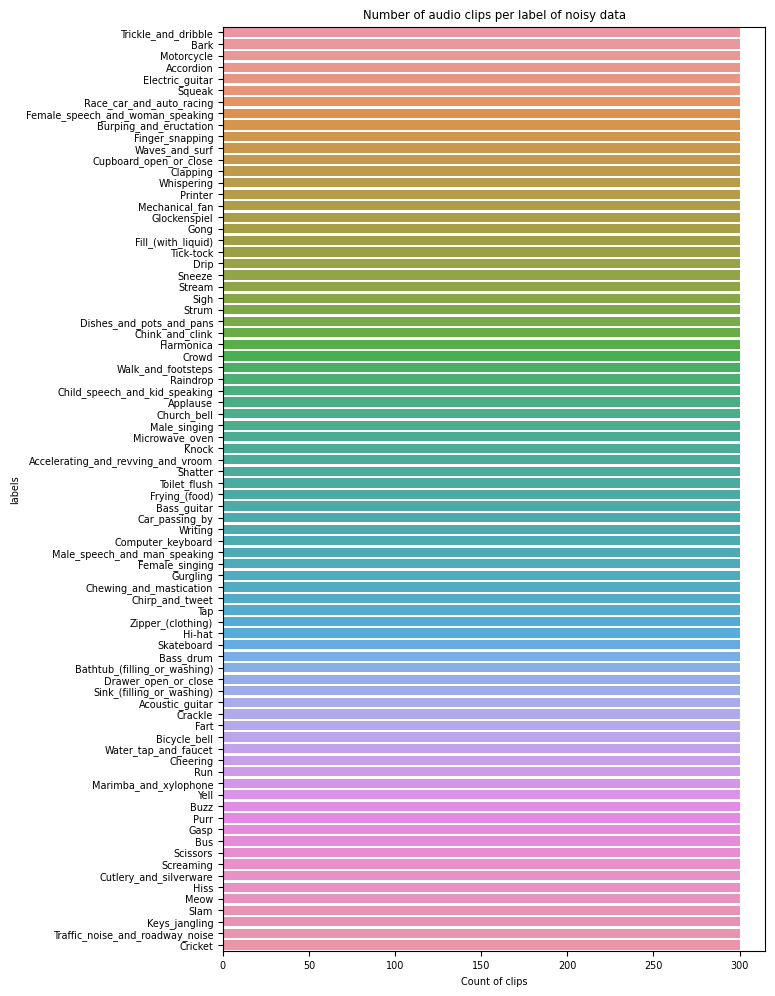

In [ ]:
#Barplot for audio clips per label
plt.figure(figsize =(7, 12))
plt.rcParams.update({'font.size': 7})
sns.barplot(data=count_df,x='count',y='labels')
plt.title('Number of audio clips per label of noisy data')
plt.xlabel('Count of clips')
plt.show()

Observation: All the labels have 300 audio files. Class labels are exactly balanced.

In [ ]:
from collections import Counter
labels_per_clip=[]
for ele in train_noisy['labels']:
    length=len(ele.split(','))
    labels_per_clip.append(length)

occurence=Counter(labels_per_clip)
count_of_lbls=[]
num_of_clips=[]
for key,value in occurence.items():
    count_of_lbls.append(key)
    num_of_clips.append(value)
labels_per_clip_df=pd.DataFrame({'count_labels':count_of_lbls,'num_of_clips':num_of_clips,'percent':list(np.round(np.array(num_of_clips)/19815*100,4))})
labels_per_clip_df

count_labels  num_of_clips  percent
0             1         16566  83.6033
1             2          2558  12.9094
2             3           504   2.5435
3             4           141   0.7116
4             5            38   0.1918
5             6             4   0.0202
6             7             4   0.0202

Observation: 83.6 % audio files in noisy data have only one label. 

In [8]:
#getting length of audio files in noisy data
length_list=[]
for ele in train_noisy['fname']:
  with wave.open("/content/noisy_data/"+ele) as mywav:
    duration_seconds = mywav.getnframes() / mywav.getframerate()
    length_list.append(duration_seconds)

In [ ]:
print('median of duartion of audio files for noisy data is',np.median(length_list))

median of duartion of audio files for noisy data is 15.0


In [9]:
#adding duration column 
train_noisy['duration']=length_list

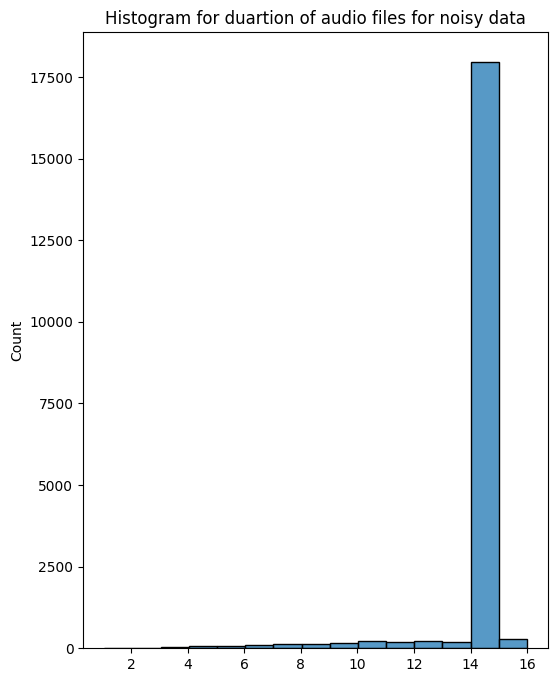

In [17]:
plt.figure(figsize=(6,8))
sns.histplot(length_list,bins=15)
plt.title('Histogram for duartion of audio files for noisy data')
plt.show()

We can see that most of the audio files duration for noisy data is roughly around 15 sec

In [ ]:
dur_per=len(train_noisy[train_noisy['duration']==15])/19815*100
print(np.round(dur_per,4),'% of audio files of noisy data have duartion of 15 sec')

89.6694 % of audio files of noisy data have duartion of 15 sec


In [10]:
# Choosing five random labels
ten_random_labels = np.random.choice(list(labels_list), size=10, replace=False)
ten_random_labels

array(['Toilet_flush', 'Scissors', 'Chink_and_clink', 'Accordion',
       'Crackle', 'Burping_and_eructation', 'Yell', 'Meow',
       'Sink_(filling_or_washing)', 'Child_speech_and_kid_speaking'],
      dtype='<U34')

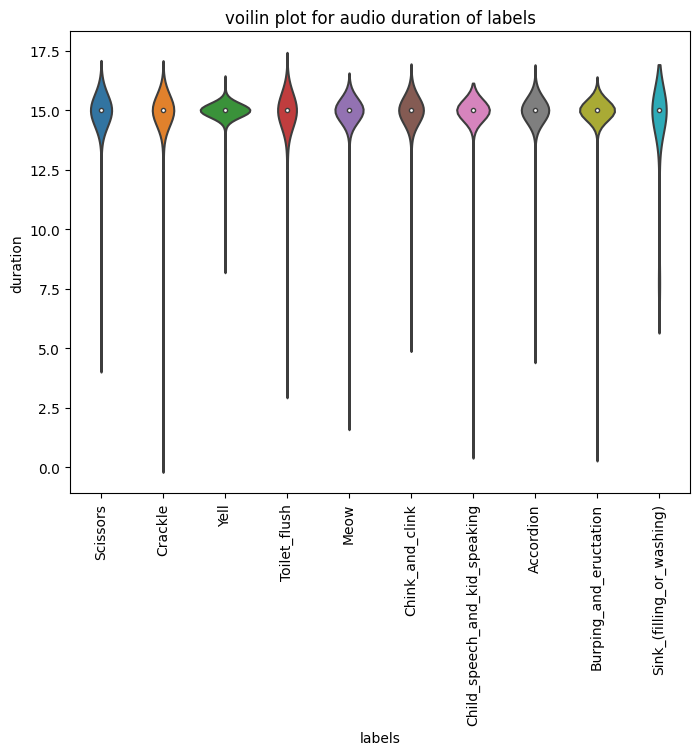

In [13]:
#voilin plot for audio duration of random five different labels
df=train_noisy[train_noisy['labels'].isin(list(ten_random_labels))]
plt.figure(figsize =(8, 6))
sns.violinplot(x='labels', y='duration', data=df)
plt.xticks(rotation=90)
plt.title('voilin plot for audio duration of labels')
plt.show()

In noisy data most of labels have same variance of duration.

In [14]:
#getting peak amplitude and avg amplitude (noisy data)
peak_amp_lst=[]
avg_amp_lst=[]
for ele in train_noisy['fname']:
  samplerate, data = scipy.io.wavfile.read("/content/noisy_data/"+ele)
  abs_data = np.abs(data)
  peak_amp_lst.append(np.max(abs_data))
  avg_amp_lst.append(np.mean(abs_data))


Text(0.5, 1.0, 'histogram of peak amplitude for noisy data')

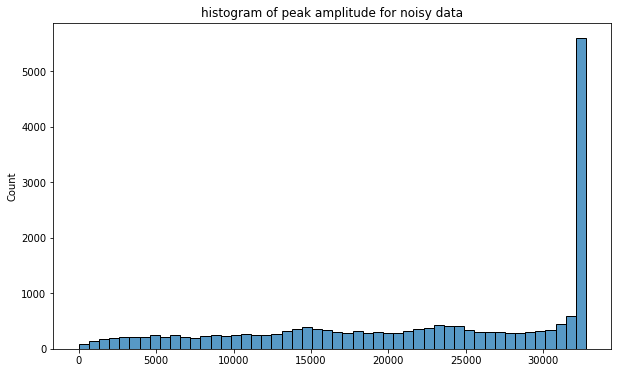

In [ ]:
plt.figure(figsize =(10, 6))
sns.histplot(peak_amp_lst,bins=50)
plt.title('histogram of peak amplitude for noisy data')
plt.show()

Observation: Most of the audio files have peak amplitude greater than 30k. This histogram looks similar to curated data histogram

Text(0.5, 1.0, 'histogram of avg amplitude for noisy data')

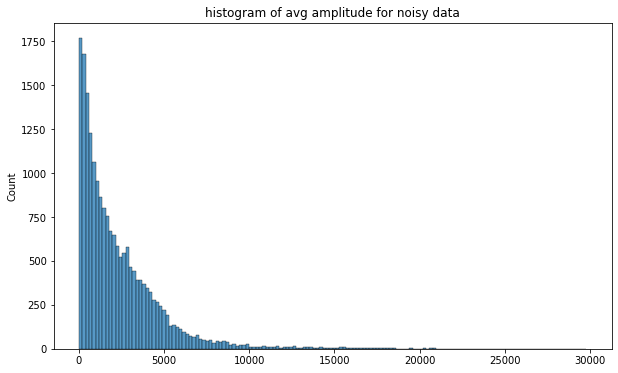

In [ ]:
plt.figure(figsize =(10, 6))
sns.histplot(avg_amp_lst)
plt.title('histogram of avg amplitude for noisy data')

Observation: most of the values have average amplitude near zero value and very few values have avg amplitude grater than 20k. this is similar to histogram of avg amplitude of curated data.

# Overall Observations from EDA
* Curated Data set contains more than 4.9k audio files whereas Noisy data set contains more than 19.8k files. Thus 
Overall we have roughly 24.7k files in our training data set.
* Our training data set contains 80 unique labels. All the labels in our curated data set are somewhat balanced
we can see almost all labels have 75 audio files each. Very few labels have less than 75 audio files. All
the labels in noisy data are exactly balance. Each label has 300 audio files.
* Thus we have 375 files for each label in our whole training data.
* The median for duration of curated data is 4.674 sec whereas noisy data has median of 15 sec.
* 50% of the files have duration between 0-3 sec in curated data. 89% files in noisy data has duration of exactly 15 sec.
* file 77b925c2.wav is an oulier in curated data.
* 87% audio files in curated data and 83% in noisy data have only one label.
* Most of the files in both curated and noisy data have peak amplitude greater than 30k.
